In [2]:
import pandas as pd
from odo import odo, discover, resource
# from bokeh.charts import Bar, TimeSeries, output_file, show, output_notebook
from altair import Chart, X, Y, Axis, SortField, Bin
# output_notebook()

In [33]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 45

In [4]:
discover(resource('data/2016-Liberal-Contributions.csv'))

dshape("var * {DonorName: ?string, Amount: float64, Date: ?datetime}")

In [43]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))

pd.concat([df, df2])

A  B
0  1  2
1  3  4
0  5  6
1  7  8

In [44]:
liberal_contributions_2016 = odo('data/2016-Liberal-Contributions.csv', \
                            pd.DataFrame)

liberal_contributions_2013_15 = odo('data/2013-2016-Liberal-Contributions.csv', \
                            pd.DataFrame)

# liberal_contributions = odo('data/2016-Liberal-Contributions.csv', \
#                             pd.DataFrame)
liberal_contributions_2016.describe()
liberal_contributions_2013_15.describe()

liberal_contributions_2016['DonorName'] = liberal_contributions_2016['DonorName'].str.upper()

liberal_contributions = pd.concat([liberal_contributions_2013_15, liberal_contributions_2016])
liberal_contributions.describe()

Amount
count   15941.000000
mean      762.673077
std      4237.766055
min         5.000000
25%        50.000000
50%       125.000000
75%       300.000000
max    200000.000000

Amount
count   25819.000000
mean     1289.827972
std      4268.590674
min         1.000000
25%       150.000000
50%       300.000000
75%      1000.000000
max    200000.000000

Amount
count   41760.00000
mean     1088.59770
std      4264.49646
min         1.00000
25%       100.00000
50%       250.00000
75%       600.00000
max    200000.00000

In [45]:
liberal_contributions.sort_values(by='Amount', ascending=False).head(10)

DonorName    Amount       Date
21             2300 KINGSWAY RESIDENCES  200000.0 2016-02-26
7857          JOHN REDEKOP CONSTRUCTION  200000.0 2016-02-26
96                         GOLDCORP INC  200000.0 2013-01-24
5492                KEG RESTAURANTS LTD  150000.0 2013-05-17
12154              PWO INVESTMENTS LTD.  100000.0 2016-02-26
630    TECK HIGHLAND VALLEY COPPER CORP  100000.0 2013-02-12
13543                       SEASPAN ULC  100000.0 2016-02-26
631                  TECK RESOURCES LTD  100000.0 2013-02-12
11919                     PETER REDEKOP  100000.0 2016-02-26
5066                      RICHARD ILICH  100000.0 2013-05-10

In [47]:
top10_donors = liberal_contributions.groupby('DonorName')['Amount'] \
.sum().sort_values(ascending=False).head(10)

top10_donors

liberal_contributions_2016.groupby('DonorName')['Amount'] \
.sum().sort_values(ascending=False).head(10)

DonorName
PETER REDEKOP                                             480000.00
NEW CAR DEALERS ASSOCIATION OF BC                         447065.58
AQUILINI INVESTMENT GROUP LP                              394135.00
TECK RESOURCES LTD                                        341430.00
ENCANA CORP                                               299416.00
WEST FRASER MILLS LTD                                     262995.25
GOLDCORP INC                                              250000.00
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC    249574.50
CONCORD PACIFIC DEVELOPMENTS INC                          217500.00
SEASPAN ULC                                               210050.00
Name: Amount, dtype: float64

DonorName
PETER REDEKOP                        250000.0
JOHN REDEKOP CONSTRUCTION            200000.0
2300 KINGSWAY RESIDENCES             200000.0
AQUILINI INVESTMENT GROUP LP         131000.0
TECK RESOURCES LIMITED               128650.0
NEW CAR DEALERS ASSOCIATION OF BC    109550.0
MCL MOTORS 2010                      109000.0
SEASPAN ULC                          107050.0
DENNIS J. WILSON                     100500.0
LANE MERRIFIELD                      100000.0
Name: Amount, dtype: float64

In [48]:
liberal_contributions.groupby('DonorName')['Amount'] \
.count().sort_values(ascending=False).head(10)

DonorName
NEW CAR DEALERS ASSOCIATION OF BC                         101
JANET SMUKOWICH                                            61
ENCANA CORP                                                58
TELUS                                                      56
INSURANCE BUREAU OF CANADA                                 53
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC     53
MARK ROBERTSON                                             50
GATEWAY CASINOS & ENTERTAINMENT LTD                        50
TOLKO INDUSTRIES LTD                                       47
MARK JILES                                                 42
Name: Amount, dtype: int64

In [49]:
liberal_contributions.loc[liberal_contributions['DonorName']\
                          .isin(top10_donors.keys())]
                          

DonorName    Amount       Date
70                                           SEASPAN ULC    5000.0 2013-01-18
96                                          GOLDCORP INC  200000.0 2013-01-24
383                                   TECK RESOURCES LTD     200.0 2013-01-31
451                                          ENCANA CORP     125.0 2013-02-01
488                    NEW CAR DEALERS ASSOCIATION OF BC    2000.0 2013-02-01
603                    NEW CAR DEALERS ASSOCIATION OF BC    5000.0 2013-02-12
631                                   TECK RESOURCES LTD  100000.0 2013-02-12
642                                WEST FRASER MILLS LTD    1800.0 2013-02-18
719                    NEW CAR DEALERS ASSOCIATION OF BC   10000.0 2013-02-19
791                    NEW CAR DEALERS ASSOCIATION OF BC    1000.0 2013-02-21
880                                   TECK RESOURCES LTD   10000.0 2013-02-27
881                                   TECK RESOURCES LTD    4000.0 2013-02-27
887                                WEST FRASER MILLS LTD   10000.0 2013-02-27
1167                        AQUILINI INVESTMENT GROUP LP    1760.0 2013-03-01
1460                                  TECK RESOURCES LTD    8000.0 2013-03-11
1500   INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATI...     750.0 2013-03-13
1632   INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATI...    4000.0 2013-03-14
1727                               WEST FRASER MILLS LTD     850.0 2013-03-14
1728                               WEST FRASER MILLS LTD     850.0 2013-03-14
1830   INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATI...    6000.0 2013-03-22
1831   INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATI...    2000.0 2013-03-22
1832   INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATI...    6000.0 2013-03-22
...                                                  ...       ...        ...
11085                  NEW CAR DEALERS ASSOCIATION OF BC    1500.0 2016-05-31
11086                  NEW CAR DEALERS ASSOCIATION OF BC    1500.0 2016-06-03
11087                  NEW CAR DEALERS ASSOCIATION OF BC   30750.0 2016-06-17
11088                  NEW CAR DEALERS ASSOCIATION OF BC    7250.0 2016-08-05
11089                  NEW CAR DEALERS ASSOCIATION OF BC    9600.0 2016-09-16
11090                  NEW CAR DEALERS ASSOCIATION OF BC    2000.0 2016-09-30
11091                  NEW CAR DEALERS ASSOCIATION OF BC    8500.0 2016-11-03
11092                  NEW CAR DEALERS ASSOCIATION OF BC    2000.0 2016-12-19
11918                                      PETER REDEKOP   50000.0 2016-01-15
11919                                      PETER REDEKOP  100000.0 2016-02-26
11920                                      PETER REDEKOP  100000.0 2016-12-19
13542                                        SEASPAN ULC    1000.0 2016-01-31
13543                                        SEASPAN ULC  100000.0 2016-02-26
13544                                        SEASPAN ULC    5000.0 2016-03-31
13545                                        SEASPAN ULC    1050.0 2016-06-17
15480                              WEST FRASER MILLS LTD   22500.0 2016-02-26
15481                              WEST FRASER MILLS LTD    1800.0 2016-04-01
15482                              WEST FRASER MILLS LTD   10000.0 2016-04-15
15483                              WEST FRASER MILLS LTD    1000.0 2016-05-20
15484                              WEST FRASER MILLS LTD    4000.0 2016-06-24
15485                              WEST FRASER MILLS LTD   10000.0 2016-09-22
15486                              WEST FRASER MILLS LTD    2500.0 2016-09-26

[344 rows x 3 columns]

In [61]:
# Search in df
liberal_contributions[liberal_contributions['DonorName']\
                      .str.contains("FOREST PROFE")]

liberal_contributions[liberal_contributions['DonorName']\
                      .str.contains("TECK")]

DonorName  Amount       Date
6501              ASSOCIATION OF BC FOREST PROFESSIONALS  1500.0 2013-07-08
12347  ASSOCIATION OF BRITISH COLUMBIA FOREST PROFESS...  4000.0 2014-04-30
21018  ASSOCIATION OF BRITISH COLUMBIA FOREST PROFESS...  4000.0 2015-05-01
889    ASSOCIATION OF BRITISH COLUMBIA FOREST PROFESS...  4000.0 2016-06-24

DonorName    Amount       Date
383                   TECK RESOURCES LTD     200.0 2013-01-31
630     TECK HIGHLAND VALLEY COPPER CORP  100000.0 2013-02-12
631                   TECK RESOURCES LTD  100000.0 2013-02-12
880                   TECK RESOURCES LTD   10000.0 2013-02-27
881                   TECK RESOURCES LTD    4000.0 2013-02-27
1460                  TECK RESOURCES LTD    8000.0 2013-03-11
3705                  TECK RESOURCES LTD     200.0 2013-04-29
6707                  TECK RESOURCES LTD    3500.0 2013-07-18
6708                  TECK RESOURCES LTD    3500.0 2013-07-18
7281                  TECK RESOURCES LTD   20000.0 2013-08-31
7852                  TECK RESOURCES LTD   10000.0 2013-10-17
8383                  TECK RESOURCES LTD    3500.0 2013-11-13
9109                  TECK RESOURCES LTD     750.0 2013-12-30
10015                 TECK RESOURCES LTD     400.0 2014-01-01
10477                 TECK RESOURCES LTD     200.0 2014-02-05
12268   TECK HIGHLAND VALLEY COPPER CORP  100000.0 2014-04-24
12269                 TECK RESOURCES LTD  100000.0 2014-04-24
12322       ALLTECK LINE CONTRACTORS INC    4000.0 2014-04-30
14050                  JANET TECKLENBORG    2000.0 2014-05-31
14498                 TECK RESOURCES LTD    4500.0 2014-06-11
14499                 TECK RESOURCES LTD   10000.0 2014-06-11
14976                  JANET TECKLENBORG      25.0 2014-07-09
...                                  ...       ...        ...
16061                  JANET TECKLENBORG      35.0 2014-09-30
16234                 TECK RESOURCES LTD    4500.0 2014-09-30
16235                 TECK RESOURCES LTD   10000.0 2014-09-30
16514                 TECK RESOURCES LTD    5000.0 2014-10-24
16535       ALLTECK LINE CONTRACTORS INC     500.0 2014-10-31
19232                 TECK RESOURCES LTD     500.0 2015-01-31
19972                 TECK RESOURCES LTD     350.0 2015-03-24
20347                 TECK RESOURCES LTD     150.0 2015-03-31
20348                 TECK RESOURCES LTD      30.0 2015-03-31
20979                 TECK RESOURCES LTD     150.0 2015-04-30
20980                 TECK RESOURCES LTD   10000.0 2015-04-30
22071                 TECK RESOURCES LTD    7000.0 2015-06-30
22888                 TECK RESOURCES LTD   10000.0 2015-08-31
22889                 TECK RESOURCES LTD    4500.0 2015-08-31
25787                 TECK RESOURCES LTD     500.0 2016-01-31
14455  TECK HIGHLAND VALLEY COPPER CORP.    4500.0 2016-05-31
14456  TECK HIGHLAND VALLEY COPPER CORP.     100.0 2016-07-15
14457             TECK RESOURCES LIMITED     500.0 2016-01-31
14458             TECK RESOURCES LIMITED   28000.0 2016-03-31
14459             TECK RESOURCES LIMITED     150.0 2016-05-31
14460             TECK RESOURCES LIMITED  100000.0 2016-12-22
15497          WESTECK WINDOWS MFG. INC.    1000.0 2016-11-21

[47 rows x 3 columns]

In [11]:
# liberal_contributions.sort_values(by='Date')

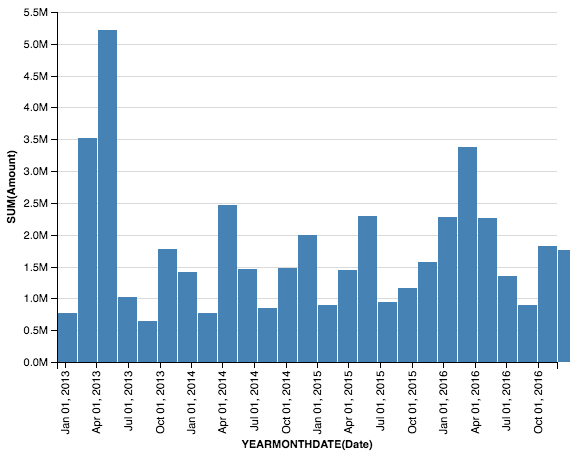

In [52]:
# Sum of contributions over the year, by week
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins = 52),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'sum'
    )
)
p

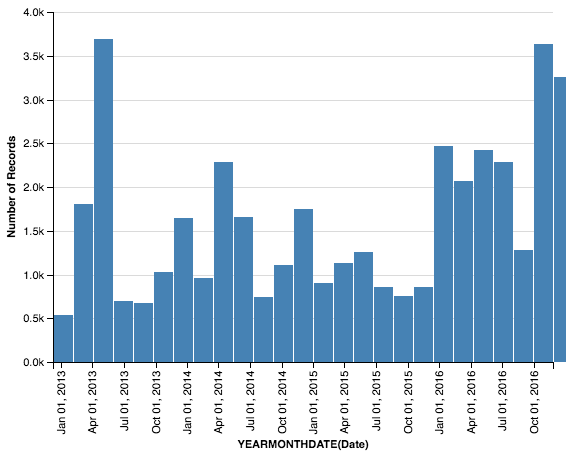

In [53]:
# Count of contributions over the year
p = Chart(liberal_contributions).mark_bar().encode(
    x=X(
        'Date:T', 
        bin = Bin( maxbins=52 ),
        timeUnit = "yearmonthdate"
    ), 
    y=Y(
        'Amount',
        aggregate = 'count'
    )
)
p

In [54]:
contributions_by_week = liberal_contributions.groupby('Date')['Amount']\
        .sum().reset_index()
contributions_by_week['cumulative'] = \
        contributions_by_week['Amount'].cumsum()

# contributions_by_week

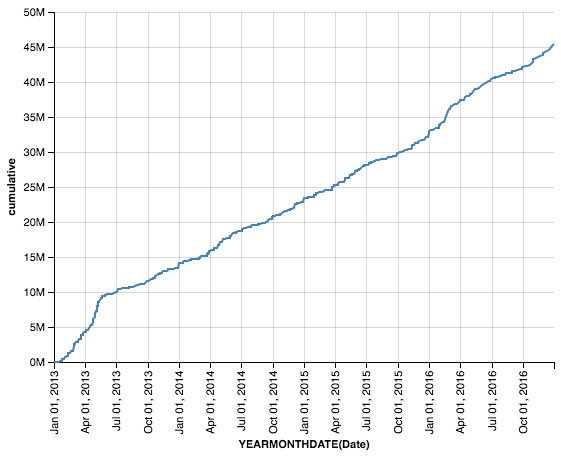

In [55]:
p = Chart(contributions_by_week).mark_line().encode(
    x=X(
        'Date:T', 
        timeUnit = "yearmonthdate",
        axis = Axis ( ticks = 12 )
    ), 
    y='cumulative'
)
p

In [56]:
# liberal_contributions.groupby([liberal_contributions.Date.dt.month,'DonorName'])\
#             .agg({'Amount':sum})
    
# liberal_contributions.groupby(liberal_contributions.Date.dt.month)\
#             ['Amount'].nlargest(2)

for year in range(2013, 2017):
    print(year)
    for month in range(1, 13):
        month_plus_one = month + 1
        print(month)
        if month_plus_one == 13:
            mask = (liberal_contributions['Date'] > f'{year}-{month}') & (liberal_contributions['Date'] < f'{year}-12-31')
        else:
            mask = (liberal_contributions['Date'] > f'{year}-{month}') & (liberal_contributions['Date'] < f'{year}-{month_plus_one}')

        liberal_contributions.loc[mask].groupby('DonorName')['Amount'] \
        .sum().sort_values(ascending=False).head(10)

2013
1


DonorName
GOLDCORP INC                         200000.0
7-ELEVEN CANADA INC                   10000.0
DRI CAPITAL INC                       10000.0
BORDEN LADNER GERVAIS LLP             10000.0
BC MARITIME EMPLOYERS ASSOCIATION     10000.0
CANADIAN FOREST PRODUCTS LTD          10000.0
JOEY RESTAURANT GROUP                  5000.0
SEASPAN ULC                            5000.0
BLUE SKY PROPERTIES INC                5000.0
O'NEILL HOTELS AND RESORTS LTD         5000.0
Name: Amount, dtype: float64

2


DonorName
TECK RESOURCES LTD                  114000.0
TECK HIGHLAND VALLEY COPPER CORP    100000.0
SILVER WHEATON CORP                 100000.0
LOW TIDE PROPERTIES                  50000.0
WHIL CONCEPTS INC                    50000.0
ROBERT H. LEE                        40000.0
703876 BC LTD                        40000.0
COPPER FOX METALS INC                25000.0
CANADIAN NATURAL RESOURCES LTD       25000.0
CNR (ECHO) RESOURCES INC             25000.0
Name: Amount, dtype: float64

3


DonorName
KEBET HOLDINGS LTD                                        54000.0
CANADIAN PACIFIC RAILWAY LTD                              50000.0
DEANS KNIGHT CAPITAL MANAGEMENT LTD                       50000.0
GWYN MORGAN                                               50000.0
STARLINE ARCHITECTURAL WINDOWS LTD                        50000.0
PETER M. BROWN                                            50000.0
HAYWOOD SECURITIES INC                                    50000.0
MOUNT POLLEY MINING CORP                                  45720.0
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC    32600.0
MCGILLICUTTY MANAGEMENT CORP                              25000.0
Name: Amount, dtype: float64

4


DonorName
JOHN S. MAJOR                                             60000.0
LEDCOR INDUSTRIES INC                                     52000.0
631385 AB LTD                                             50000.0
PALODURO INVESTMENTS INC                                  50000.0
ALLAN PAUL MARKIN                                         50000.0
328727 AB LTD                                             50000.0
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC    42474.5
MACDONALD DEVELOPMENT CORP                                40500.0
ENCANA CORP                                               33500.0
NEW CAR DEALERS ASSOCIATION OF BC                         29600.0
Name: Amount, dtype: float64

5


DonorName
KEG RESTAURANTS LTD            150000.00
RICHARD ILICH                  100000.00
WESTERN FOREST PRODUCTS INC     90000.00
WEST FRASER MILLS LTD           83611.25
RPMG HOLDINGS LTD               76000.00
BOSA DEVELOPMENT CORP           50000.00
ONOMO INVESTMENTS LTD           50000.00
CLIVE JOHNSON                   50000.00
CENOVUS ENERGY INC              30000.00
SEASPAN ULC                     30000.00
Name: Amount, dtype: float64

6


DonorName
KEBET HOLDINGS LTD                50000.0
CANADIAN FOREST PRODUCTS LTD      50000.0
FRANCESCO AQUILINI                40000.0
PRETIUM RESOURCES INC              8500.0
HARBOUR AIR LTD                    7650.0
TOLKO INDUSTRIES LTD               7500.0
CIBC HEAD OFFICE                   7500.0
GRAHAM S. LEE                      6300.0
GREG MCDOUGALL                     6300.0
TWIN ANCHORS MARINE (1977) LTD     6200.0
Name: Amount, dtype: float64

7


DonorName
AQUILINI INVESTMENT GROUP LP              50000.0
NEW CAR DEALERS ASSOCIATION OF BC         45000.0
BURNCO ROCK PRODUCTS LTD                  30000.0
CEMENT ASSOCIATION OF CANADA              30000.0
JAMES RICHARDSON & SONS LTD               20000.0
LIQUOR STORES GP INC                      15000.0
BOREALIS INFRASTRUCTURE MANAGEMENT INC    15000.0
SEASPAN ULC                               15000.0
TELUS CORP                                12000.0
MAINLAND SAND & GRAVEL LTD                10000.0
Name: Amount, dtype: float64

8


DonorName
TECK RESOURCES LTD                                      20000.0
CHARLES J. BYRNE                                        15000.0
MEG ENERGY CORP                                         11000.0
ENCANA CORP                                             10500.0
KASIAN ARCHITECTURE INTERIOR DESIGN AND PLANNING LTD     7500.0
BC MARITIME EMPLOYERS ASSOCIATION                        7500.0
PACIFIC CUSTOMS BROKERS LTD                              7500.0
MARK ANTHONY GROUP INC                                   7500.0
CANADIAN NATIONAL RAILWAY COMPANY                        7000.0
ALLIANCE OF BEVERAGE LICENSEES                           7000.0
Name: Amount, dtype: float64

9


DonorName
ENCANA CORP                       35000.0
BFI CANADA INC                    30000.0
CEMENT ASSOCIATION OF CANADA      30000.0
CAPSTONE MINING CORP              25000.0
KPMG MANAGEMENT SERVICES LP       25000.0
FASKEN MARTINEAU DUMOULIN LLP     25000.0
LABATT BREWING COMPANY LTD        25000.0
WESTERN FOREST PRODUCTS INC       14000.0
TWIN ANCHORS MARINE (1977) LTD    12360.0
LEDCOR INDUSTRIES INC             11000.0
Name: Amount, dtype: float64

10


DonorName
RICHARD ILICH                 50000.0
LARK PROJECTS LTD             50000.0
HOLBORN HOLDINGS LTD          50000.0
DAYHU INVESTMENTS LTD         50000.0
LOON PROPERTIES INC           20000.0
SHAW COMMUNICATIONS INC       20000.0
AUGUSTA INVESTMENTS INC       20000.0
DELTA LAND DEVELOPMENT LTD    20000.0
DUNCAN SINCLAIR               20000.0
BOSA PROPERTIES INC           20000.0
Name: Amount, dtype: float64

11


DonorName
SANDMAN HOTELS                                           50000.0
AQUILINI DEVELOPMENT AND CONSTRUCTION INC                50000.0
SEASPAN ULC                                              25000.0
KYLE R. WASHINGTON                                       25000.0
AQUILINI INVESTMENT GROUP LP                             23525.0
TINA YANG                                                20000.0
LIFELABS INC                                             12500.0
DECATHLON DEVELOPMENTS DIV OF OAKLAWN ENTERPRISES LTD    10000.0
THE TORONTO-DOMINION BANK                                10000.0
CIBC HEAD OFFICE                                         10000.0
Name: Amount, dtype: float64

12


DonorName
BILL'S DEVELOPMENT LTD                      10750.0
MATSQUI DEVELOPMENT CO LTD                  10000.0
RETIREMENT CONCEPTS SENIORS SERVICES LTD     7500.0
GOLDEN VALLEY FOODS LTD                      6000.0
BOREALIS INFRASTRUCTURE MANAGEMENT INC       5500.0
RICKY CONSTRUCTION LTD                       5000.0
PROGRESSIVE HOLDINGS LTD                     4800.0
BELKORP ENVIRONMENTAL SERVICES INC           4600.0
BFI CANADA INC                               4000.0
628032 BC LTD DBA MK DELTA LANDS GROUP       4000.0
Name: Amount, dtype: float64

2014
1


DonorName
CANFOR PULP LIMITED PARTNERSHIP    50000.0
SHAPE PROPERTIES CORP              50000.0
ALBERTA NEWSPAPER GROUP INC        28750.0
F. DAVID RADLER                    21250.0
TRIVIUM PROPERTIES LTD             15000.0
MCL MOTOR CARS                     10000.0
WESBILD HOLDINGS LTD               10000.0
KPMG LLP                           10000.0
BANK OF MONTREAL LTD                5000.0
ENCANA CORP                         5000.0
Name: Amount, dtype: float64

2


DonorName
LABATT BREWING COMPANY LTD                         20000.0
MIKE WIEGELE HELICOPTER SKIING LTD                 10000.0
SPECTRA ENERGY WESTCOAST ENERGY INC BC PIPELINE    10000.0
DAVID W. MITCHELL INC                               5000.0
A. ALLAN SKIDMORE                                   5000.0
ADVANTEC GLOBAL INNOVATIONS                         5000.0
BELKORP ENVIRONMENTAL SERVICES INC                  5000.0
PETER ASH                                           5000.0
JOHN A. BLOCK                                       5000.0
LISE M. ASH                                         5000.0
Name: Amount, dtype: float64

3


DonorName
CONCORD PACIFIC DEVELOPMENTS INC          50000.0
JOHN S. MAJOR                             20000.0
BC REAL ESTATE ASSOCIATION                19000.0
DUNCAN SINCLAIR                           18350.0
ANTHEM PROPERTIES GROUP LTD               17600.0
WEST FRASER MILLS LTD                     17500.0
POLYGON HOMES LTD                         14500.0
TREVOR HAYNES                             10000.0
STAN FULLER                               10000.0
BRITISH COLUMBIA HOTEL ASSOCIATION INC    10000.0
Name: Amount, dtype: float64

4


DonorName
TECK RESOURCES LTD                   100000.0
TECK HIGHLAND VALLEY COPPER CORP     100000.0
NEW CAR DEALERS ASSOCIATION OF BC     29000.0
CACTUS RESTAURANTS LTD                20000.0
BFI CANADA INC                        19750.0
SEASPAN ULC                           15000.0
INSURANCE BUREAU OF CANADA            14200.0
SALEM CONTRACTING LTD                 12500.0
PACIFIC CUSTOMS BROKERS LTD           12500.0
HARBOUR AIR LTD                       11500.0
Name: Amount, dtype: float64

5


DonorName
POLYGON HOMES LTD               20000.0
ANTHEM PROPERTIES GROUP LTD     14500.0
PCI HOLDINGS CORP               14500.0
CRESSEY DEVELOPMENT CORP        14500.0
WESBILD HOLDINGS LTD            12000.0
RPMG HOLDINGS LTD               11500.0
WESTBANK PROJECTS CORP          10000.0
P M BULL & COMPANY LTD          10000.0
DAYHU CAPITAL LTD               10000.0
CHEVRON CANADA RESOURCES LTD    10000.0
Name: Amount, dtype: float64

6


DonorName
SHI YU LIU                                   31863.0
BURNCO ROCK PRODUCTS LTD                     30000.0
RUOXIONG WANG                                30000.0
GUIFANG ZHU                                  30000.0
SHU MIN WU                                   30000.0
AQUILINI DEVELOPMENT AND CONSTRUCTION INC    20000.0
RG PROPERTIES LTD                            14500.0
TECK RESOURCES LTD                           14500.0
KEG RESTAURANTS LTD                          10000.0
EDF EN CANADA DEVELOPMENT INC                10000.0
Name: Amount, dtype: float64

7


DonorName
YU WEN                                       52275.0
ROSY YANJING SHANG                           52275.0
PAPER EXCELLENCE CANADA HOLDINGS CORP        50000.0
LIQUOR STORES GP INC                         20250.0
J&J SHARED SERVICES                          20000.0
NEW CAR DEALERS ASSOCIATION OF BC            19000.0
ERNST & YOUNG LLP                            14500.0
NATIONAL PUBLIC RELATIONS (VANCOUVER) INC    10300.0
DENFRE ENTERPRISES INC                       10130.0
PRO-SPEC PRODUCTION SERVICES LTD             10000.0
Name: Amount, dtype: float64

8


DonorName
WEST COAST REDUCTION LTD                                       20000.0
COASTAL GAS LINK PIPELINE WEST COAST BC LIMITED PARTNERSHIP    12500.0
LIQUOR STORES GP INC                                            8500.0
ENCANA CORP                                                     7136.0
COAST CAPITAL SAVINGS CREDIT UNION                              7000.0
INNERGEX RENEWABLE ENERGY INC                                   7000.0
ROGERS GROUP OF COMPANIES INC                                   7000.0
DUNCAN SINCLAIR                                                 6100.0
BFI CANADA INC                                                  5000.0
NEW CAR DEALERS ASSOCIATION OF BC                               5000.0
Name: Amount, dtype: float64

9


DonorName
BFI CANADA INC                                        30350.0
PREDATOR RIDGE GOLF CLUB LTD                          25000.0
MAYFAIR ROAD PROJECT 2 DEVELOPMENTS INC               20000.0
DELTA LAND DEVELOPMENT LTD                            20000.0
HEARTHSTONE INVESTMENTS LTD                           15000.0
JAMES A. ALLARD                                       15000.0
TECK RESOURCES LTD                                    14500.0
PRINCE RUPERT GAS TRANSMISSION LIMITED PARTNERSHIP    12500.0
SPRUCELAND 10TH AVENUE LIQUOR STORE LTD               12000.0
MCELHANNEY CONSULTING SERVICES LTD                    11200.0
Name: Amount, dtype: float64

10


DonorName
PETER REDEKOP                   50000.00
ENCANA CORP                     36500.00
LEDCOR INDUSTRIES INC           17000.00
CANADIAN FOREST PRODUCTS LTD    15302.24
SKOOKUMCHUCK PULP INC           12500.00
CATALYST PAPER CORP             10000.00
WEST FRASER MILLS LTD           10000.00
WESTERN FOREST PRODUCTS INC     10000.00
MCMILLAN LLP                    10000.00
INTERFOR CORP                   10000.00
Name: Amount, dtype: float64

11


DonorName
DAYHU CAPITAL LTD                       50000.0
FASKEN MARTINEAU DUMOULIN LLP           27000.0
HOLBORN HOLDINGS LTD                    25000.0
TA MANAGEMENT LTD                       25000.0
KPMG LLP                                25000.0
AQUILINI INVESTMENT GROUP LP            20450.0
CENOVUS ENERGY INC                      15750.0
CHEVRON CANADA LTD                      10000.0
CATHY ZHILAN LUO                        10000.0
SHERATON VANCOUVER WALL CENTRE HOTEL     9100.0
Name: Amount, dtype: float64

12


DonorName
TOWNLINE HOMES INC                  50000.0
LARK ENTERPRISES LTD                50000.0
SHAPE PROPERTIES CORP               50000.0
CONCORD PACIFIC DEVELOPMENTS INC    50000.0
DAVID SIDOO                         50000.0
MCL MOTOR CARS                      50000.0
ENCANA CORP                         40000.0
MONARK MEDIA VENTURES LTD           28000.0
DELOITTE & TOUCHE LLP               27500.0
THE DELLS HOLDINGS LTD              12500.0
Name: Amount, dtype: float64

2015
1


DonorName
ALPINE GROUP OF COMPANIES              16250.0
TELUS                                  13750.0
PETER R. B. ARMSTRONG                   7500.0
ECOTEX HEALTHCARE LINEN SERVICE INC     7500.0
FYI EYE DOCTORS INC                     7500.0
JCK INVESTMENTS LTD                     7500.0
JOHN MONTALBANO                         7500.0
CACTUS RESTAURANTS LTD                  7500.0
BRITISH COLUMBIA HOTEL ASSOCIATION      7500.0
MARK ANTHONY GROUP INC                  7500.0
Name: Amount, dtype: float64

2


DonorName
DUNCAN SINCLAIR                   25000.0
TOLKO INDUSTRIES LTD              11500.0
LIFELABS INC                      10000.0
THE LANGLEY CONCRETE GROUP        10000.0
LANGARA FISHING ADVENTURES LTD    10000.0
NEWTON SQUARE PROPERTIES LTD       9250.0
AQUILINI GROUP PROPERTIES LP       8500.0
SCOTIABANK                         7500.0
R.C. PURDY CHOCOLATES LTD          7500.0
HUB INTERNATIONAL TOS LTD          7500.0
Name: Amount, dtype: float64

3


DonorName
THE CHARLES F. WHITE CORP            50000.0
STARLINE WINDOWS (2001) LTD          20000.0
NEWTON SQUARE PROPERTIES LTD         14850.0
NEW CAR DEALERS ASSOCIATION OF BC    13700.0
DUNCAN SINCLAIR                      10850.0
PHILIP HOCHSTEIN                     10600.0
PRETIUM RESOURCES INC                10030.0
ONEX CORP                            10000.0
MCCARTHY TETRAULT LLP                10000.0
LIFELABS INC                         10000.0
Name: Amount, dtype: float64

4


DonorName
WEST FRASER MILLS LTD                    25000.0
BC REAL ESTATE ASSOCIATION               19000.0
LOWER MAINLAND ESTATES LTD               15000.0
PAPER EXCELLENCE CANADA HOLDINGS CORP    15000.0
POLYGON HOMES LTD                        14500.0
TOLKO INDUSTRIES LTD                     14000.0
WESBILD HOLDINGS LTD                     12000.0
THE CHARLES F. WHITE CORP                12000.0
TELUS                                    10300.0
TECK RESOURCES LTD                       10150.0
Name: Amount, dtype: float64

5


DonorName
THE CHARLES F. WHITE CORP              50000.0
DAYHU CAPITAL LTD                      50000.0
GATEWAY CASINOS & ENTERTAINMENT LTD    27250.0
MADISON PACIFIC PROPERTIES INC         25000.0
SHAW COMMUNICATIONS INC                25000.0
LOWER MAINLAND PUBLISHING GROUP INC    25000.0
CANADA'S NATIONAL BREWERS              20759.0
TOWNLINE HOMES INC                     20000.0
CONCORD PACIFIC DEVELOPMENTS INC       20000.0
POLYGON HOMES LTD                      20000.0
Name: Amount, dtype: float64

6


DonorName
BAO LI ZHU                                                48000.0
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC    42000.0
NAIGANG BAO                                               40000.0
YONG SHENG ZHAO                                           30000.0
WILLIAM MCEACHNIE                                         30000.0
WEST COAST INSTANT LAWNS                                  30000.0
CACTUS RESTAURANTS LTD                                    26000.0
LIQUOR STORES GP INC                                      22500.0
KYLE WASHINGTON                                           20000.0
AQUILINI INVESTMENT GROUP LP                              18000.0
Name: Amount, dtype: float64

7


DonorName
PRETIUM RESOURCES INC                    40000.0
ROGERS GROUP OF COMPANIES INC            17000.0
JAMES A. ALLARD                          15250.0
SEASPAN INTERNATIONAL LTD                15000.0
RIVERS HOLDINGS LTD                      15000.0
PAPER EXCELLENCE CANADA HOLDINGS CORP    15000.0
HEARTHSTONE INVESTMENTS LTD              15000.0
LIFELABS INC                             14500.0
LARK ENTERPRISES LTD                     14500.0
WESTERN FOREST PRODUCTS INC              10000.0
Name: Amount, dtype: float64

8


DonorName
DELTA LAND DEVELOPMENT LTD            20000.0
LABATT BREWERIES OF BC                20000.0
BILL'S DEVELOPMENT LTD                18000.0
KOOTENAY GRADALL SERVICE LTD          15000.0
TECK RESOURCES LTD                    14500.0
1006903 BC LTD                        10000.0
THOMAS SEWELL BYNG GIRAUD             10000.0
CATALYST PAPER CORP                   10000.0
MCELHANNEY CONSULTING SERVICES LTD    10000.0
COAST CAPITAL SAVINGS CREDIT UNION     7000.0
Name: Amount, dtype: float64

9


DonorName
PETER REDEKOP                          50000.0
IMPERIAL OIL LTD                       17000.0
GATEWAY CASINOS & ENTERTAINMENT LTD    14800.0
WESTERN BAY PROPERTIES INC             13850.0
ALTAGAS LTD                            12000.0
VANCOUVER FILM STUDIOS LTD             12000.0
ARITZIA HOLDING INC                    10000.0
MCMILLAN LLP                           10000.0
THE FUTURA CORP                        10000.0
KESTREL HOLDINGS LTD                   10000.0
Name: Amount, dtype: float64

10


DonorName
DAYHU INVESTMENTS LTD    51200.0
MCL MOTOR CARS           50000.0
SHAPE PROPERTIES CORP    50000.0
DAVID SIDOO              50000.0
HOLBORN HOLDINGS LTD     25000.0
TA MANAGEMENT LTD        25000.0
GWYN MORGAN              25000.0
CHEVRON CANADA LTD       10000.0
PRETIUM RESOURCES INC    10000.0
SILVER WHEATON CORP      10000.0
Name: Amount, dtype: float64

11


DonorName
CONCORD PACIFIC DEVELOPMENTS INC       75000.0
BOSA PROPERTIES INC                    50000.0
WESBILD HOLDINGS LTD                   25000.0
JEFFERSON MOONEY                       25000.0
KPMG LLP                               25000.0
SAMUEL BELZBERG                        25000.0
GREAT CANADIAN RAILTOUR COMPANY LTD    25000.0
PERSIS HOLDINGS LTD                    25000.0
ARJANG NOWTASH                         25000.0
MANDALAY INVESTMENTS LTD               25000.0
Name: Amount, dtype: float64

12


DonorName
ENCANA CORP                     50000.0
LARRY LIEN KUAN YEN             50000.0
RICK ILICH                      50000.0
GERI PARTNERSHIP                50000.0
DENNIS J. WILSON                50000.0
LARK ENTERPRISES LTD            50000.0
YANZHOU HU                      30000.0
LING XU                         30000.0
AQUILINI INVESTMENT GROUP LP    25000.0
MODERN INVESTMENT GROUP LTD     25000.0
Name: Amount, dtype: float64

2016
1


DonorName
PETER REDEKOP                        100000.0
CANADIAN CLASSIFIED NETWORK INC       35000.0
CANADIAN CLASSIFIED NETWORK           35000.0
NEW CAR DEALERS ASSOCIATION OF BC     30000.0
PROGRESSIVE HOLDINGS LTD              24000.0
GREAT CANADIAN GAMING CORP            12299.0
GREAT CANADIAN GAMING CORP.           12299.0
JOHN LES                              10000.0
WAYNE BRAID                            9000.0
MAYFAIR PROPERTIES LTD                 8000.0
Name: Amount, dtype: float64

2


DonorName
JOHN REDEKOP CONSTRUCTION      200000.0
2300 KINGSWAY RESIDENCES       200000.0
RICK ILICH                     100000.0
RPMG HOLDINGS LTD.             100000.0
PWO INVESTMENTS LTD.           100000.0
PETER REDEKOP                  100000.0
SEASPAN ULC                    100000.0
BJW INVESTMENT LTD.            100000.0
BERT'S ELECTRIC (2001) LTD.    100000.0
KEBET HOLDINGS LTD.            100000.0
Name: Amount, dtype: float64

3


DonorName
DENNIS J. WILSON                          100000.0
MCL MOTORS 2010                           100000.0
6349099 CANADA LTD.                        33000.0
TECK RESOURCES LIMITED                     28000.0
LIFELABS INC                               27680.0
PROGRESSIVE WASTE SOLUTIONS CANADA INC     25000.0
PETER R B ARMSTRONG                        17500.0
MP WESTERN PROPERTIES INC.                 16000.0
NEW CAR DEALERS ASSOCIATION OF BC          15000.0
RYAN BEEDIE                                15000.0
Name: Amount, dtype: float64

4


DonorName
WESTBRIDGE FINANCE INC                      50000.0
J. ANTHONY ALLARD FAMILY TRUST              25000.0
AQUILINI INVESTMENT GROUP LP                25000.0
BRITISH COLUMBIA REAL ESTATE ASSOCIATION    22000.0
RIVERS HOLDINGS LTD.                        20000.0
JAMES A. ALLARD                             20000.0
CARRIER LUMBER LTD.                         20000.0
HEARTHSTONE INVESTMENTS LIMITED             20000.0
POLYGON HOMES LTD                           15000.0
GUIDE OUTFITTERS ASSOCIATION OF BC          14000.0
Name: Amount, dtype: float64

5


DonorName
BURNCO ROCK PRODUCTS LTD.                    34000.0
SHAW COMMUNICATIONS INC                      25000.0
GATEWAY CASINOS AND ENTERTAINMENT LIMITED    21920.0
CANADIAN FOREST PRODUCTS LTD.                20000.0
PARALLEL WELDING FABRICATION LTD             16075.0
SEASPAN INTERNATIONAL LTD                    15000.0
CHEVRON CANADA LIMITED                       15000.0
SHATO HOLDINGS LTD.                          14000.0
ENCANA CORPORATION LTD                       13750.0
THE SOCIETY OF NOTARIES PUBLIC OF BC         13500.0
Name: Amount, dtype: float64

6


DonorName
PROGRESSIVE WASTE SOLUTIONS CANADA INC                60000.0
DAYHU INVESTMENTS LTD.                                50000.0
STARLINE WINDOWS (2001) LTD.                          50000.0
NEW CAR DEALERS ASSOCIATION OF BC                     32250.0
ADERA DEVELOPMENT CORPORATION LTD                     15500.0
WAZUKU ADVISORY GROUP INC.                            13900.0
ANTHEM PROPERTIES CORP LTD                            13500.0
ADERA CAPITAL CORP. INC                               12000.0
JOHNSON & JOHNSON FAMILY OF CANADIAN COMPANIES INC    11000.0
CANADIAN NATIONAL RAILWAY COMPANY LTD                 10400.0
Name: Amount, dtype: float64

7


DonorName
INDEPENDENT CONTRACTORS & BUSINESSES ASSOCIATION OF BC    62500.0
SHAPE PROPERTIES CORP.                                    50000.0
ANTHEM PROPERTIES CORP LTD                                12000.0
CATALYST PAPER CORPORATION LTD                            10000.0
PAPER EXCELLENCE CANADA HOLDINGS CORPORATION              10000.0
PAT WARD                                                  10000.0
RESPON WEALTH MANAGEMENT CORP INC                         10000.0
WEST COAST REDUCTION LTD                                  10000.0
APOTEX INC.                                               10000.0
INSURANCE BUREAU OF CANADA                                 8000.0
Name: Amount, dtype: float64

8


DonorName
MONARK MEDIA VENTURES LTD.    20000.0
ALEXA YOUNG                   14500.0
PRETIUM RESOURCES INC.        10000.0
HANS CHANG                    10000.0
GUKAN CONSTRUCTION LTD.       10000.0
YING KEI INVESTMENT INC.      10000.0
JOSEPH NEMETH                 10000.0
THOMAS JONES                  10000.0
GOLDCORP INC                  10000.0
ASIA PACIFIC FOOD CO. LTD.    10000.0
Name: Amount, dtype: float64

9


DonorName
ENCANA CORPORATION LTD               25000.0
DELTA LAND DEVELOPMENT LTD           25000.0
TORONTO DOMINION BANK                20000.0
PATRICIA TROTTIER                    15000.0
GWYN MORGAN                          14630.0
CHEVRON CANADA LIMITED               14050.0
WEST FRASER MILLS LTD                12500.0
NEW CAR DEALERS ASSOCIATION OF BC    11600.0
TOLKO INDUSTRIES LTD                 11200.0
CANADIAN FOREST PRODUCTS LTD         11000.0
Name: Amount, dtype: float64

10


DonorName
LANE MERRIFIELD                      100000.0
AQUILINI INVESTMENT GROUP LP          81000.0
BARD & BANKER PUB COMPANY LTD         12500.0
IRISH TIMES PUB CO. LTD.              12500.0
CONSTELLATION BRANDS CANADA, INC.     10000.0
WESTERN FOREST PRODUCTS INC.          10000.0
GRAESTONE READY MIX INC                9500.0
STIKEMAN ELLIOTT (VANCOUVER)           9000.0
WHITE SPOT RESTAURANTS LTD.            8000.0
LIQUOR STORES GP INC                   7500.0
Name: Amount, dtype: float64

11


DonorName
ACTTON SUPER-SAVE GAS STATIONS LTD           25000.0
APOTEX INC.                                  20000.0
LARRY LIEN KUAN YEN                          15000.0
GATEWAY CASINOS AND ENTERTAINMENT LIMITED    10800.0
GREAT CANADIAN GAMING CORP.                  10750.0
JASON WANG                                   10000.0
QUINN DEVELOPMENTS INC                       10000.0
GATEWAY TRAVEL CENTRE INC                    10000.0
TINA YANG                                    10000.0
JOHNNY CHEUNG                                10000.0
Name: Amount, dtype: float64

12


DonorName
PETER REDEKOP                                    100000.0
TECK RESOURCES LIMITED                           100000.0
FASKEN MARTINEAU DUMOULIN LLP                     25000.0
KPMG LLP                                          25000.0
CACTUS CLUB CAFE LTD                              21000.0
HONG WANG                                         20000.0
PROGRESSIVE CONTRACTORS ASSOCIATION OF CANADA     15000.0
KEG RESTAURANTS LTD                               15000.0
DARYL GOODWIN                                     10000.0
HASSAN KHOSROWSHAHI                               10000.0
Name: Amount, dtype: float64